In [2]:
import pycaret

In [3]:
import pandas as pd
data = pd.read_excel('Dm_model_2.xlsx')
data_seats = data.drop(['AvgStartingMSRP','AvgSafetyScore','MostCommonFuelType','State'], axis=1)
data_price = data.drop(['AvgSeats','AvgSafetyScore','MostCommonFuelType','State'], axis=1)
data_safety = data.drop(['AvgSeats','AvgStartingMSRP','MostCommonFuelType','State'], axis=1)
data_fuel = data.drop(['AvgSeats','AvgStartingMSRP','AvgSafetyScore','State'], axis=1)

In [4]:
data

,State,PopDensity,TotalMeanIncome,EducationScore,AvgFamilySize,HouseholdswithChildrenUnder18,DisabilityRate,AvgSeats,AvgStartingMSRP,AvgSafetyScore,MostCommonFuelType
0,Alabama,39.0,349685,0.378591,3.06,25.076074,16.860858,5.709677,35828.548387,5.000000,diesel
1,Alaska,0.5,449716,0.254728,3.16,27.726223,13.236428,5.258065,41485.322581,4.483871,CNG
2,Arizona,25.0,418054,0.373434,3.10,25.173021,13.581416,5.580645,38775.967742,4.677419,diesel
3,Arkansas,23.0,322111,0.327862,3.06,25.979212,18.064629,4.290323,39921.129032,4.870968,diesel
4,California,97.0,541041,0.468431,3.39,27.853629,11.744177,5.000000,35527.419355,5.000000,CNG
5,Colorado,22.0,497970,0.338932,2.99,25.188586,11.571822,5.483871,36471.290323,4.838710,gasoline
6,Connecticut,288.0,544249,0.337284,3.07,25.655903,12.462747,4.967742,27914.677419,4.903226,gasoline
7,Delaware,204.0,432670,0.320094,3.04,23.608494,13.836593,5.774194,36860.000000,4.935484,diesel
8,Florida,163.0,413767,0.349342,3.03,22.944387,13.767778,5.096774,25950.645161,5.000000,gasoline
9,Georgia,74.0,415938,0.373859,3.19,27.818331,13.330680,5.774194,36951.935484,4.967742,gasoline


In [5]:
# Fuel Type
from pycaret.classification import *
s1 = setup(data_fuel, target = 'MostCommonFuelType',session_id=1243)
best1 = compare_models()

,Description,Value
0,Session id,1243
1,Target,MostCommonFuelType
2,Target type,Multiclass
3,Target mapping,"CNG: 0, diesel: 1, gasoline: 2"
4,Original data shape,"(50, 7)"
5,Transformed data shape,"(50, 7)"
6,Transformed train set shape,"(35, 7)"
7,Transformed test set shape,"(15, 7)"
8,Numeric features,6
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7500,0.0000,0.7500,0.7417,0.7050,0.5256,0.5723,0.0480
rf,Random Forest Classifier,0.6917,0.0000,0.6917,0.6778,0.6450,0.3922,0.4336,0.0580
qda,Quadratic Discriminant Analysis,0.6833,0.0000,0.6833,0.6528,0.6483,0.3789,0.3948,0.0290
nb,Naive Bayes,0.6667,0.0000,0.6667,0.6667,0.6389,0.4465,0.4862,0.0100
knn,K Neighbors Classifier,0.6417,0.0000,0.6417,0.6528,0.6050,0.3089,0.3526,0.0140
dt,Decision Tree Classifier,0.6417,0.0000,0.6417,0.6833,0.6333,0.4165,0.4645,0.0150
gbc,Gradient Boosting Classifier,0.6333,0.0000,0.6333,0.7083,0.6289,0.3556,0.4147,0.0780
ridge,Ridge Classifier,0.6250,0.0000,0.6250,0.6000,0.5917,0.3022,0.3165,0.0090
lda,Linear Discriminant Analysis,0.5917,0.0000,0.5917,0.6333,0.5911,0.2489,0.2707,0.0130
ada,Ada Boost Classifier,0.5833,0.0000,0.5833,0.5653,0.5511,0.2067,0.2225,0.0650


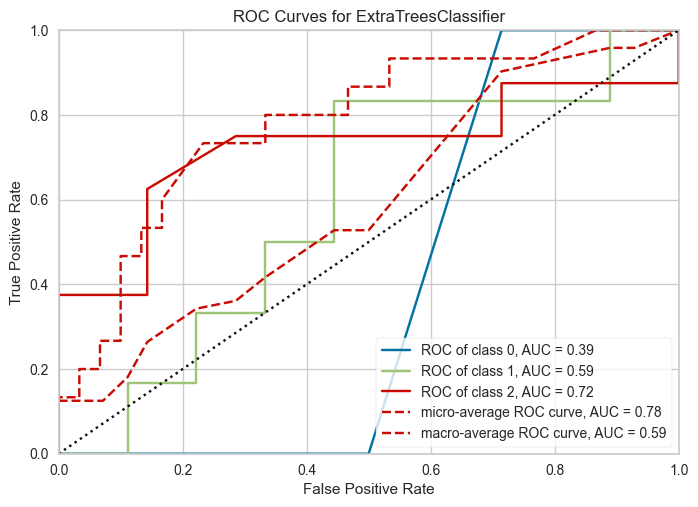

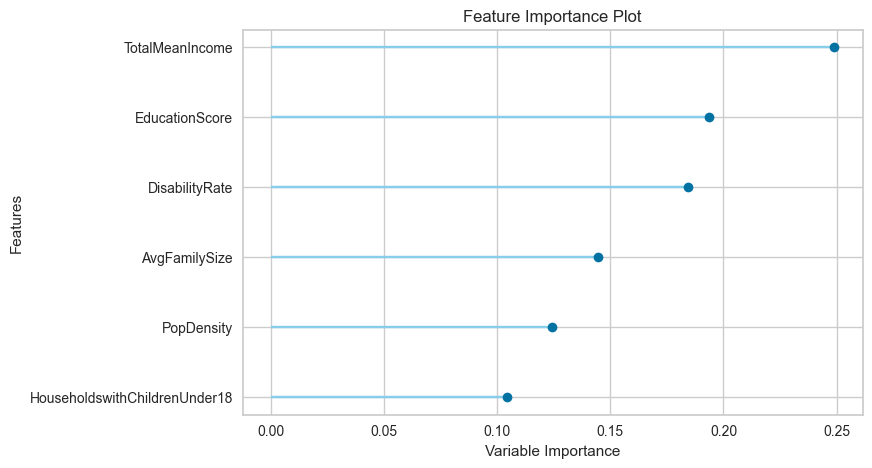

In [6]:
plot_model(best1, plot = 'auc')
plot_model(best1, plot = 'feature')

In [7]:
# Price
from pycaret.regression import *
data_price2 = data_price.drop(['EducationScore', 'AvgFamilySize','DisabilityRate'], axis=1)
s2 = setup(data_price2, target = 'AvgStartingMSRP',session_id=1243, 
           remove_multicollinearity = True, multicollinearity_threshold = 0.7,
           normalize=True, normalize_method='zscore')
best2 = compare_models()

,Description,Value
0,Session id,1243
1,Target,AvgStartingMSRP
2,Target type,Regression
3,Original data shape,"(50, 4)"
4,Transformed data shape,"(50, 4)"
5,Transformed train set shape,"(35, 4)"
6,Transformed test set shape,"(15, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1971.6667,8870326.7762,2406.9043,-0.2368,0.0714,0.0598,0.0600
et,Extra Trees Regressor,2004.3338,8800143.3996,2435.3279,-0.3803,0.0720,0.0605,0.0330
knn,K Neighbors Regressor,2017.9089,8349019.1719,2291.6835,-0.5536,0.0678,0.0612,0.0130
huber,Huber Regressor,2067.2798,7934676.1345,2353.1989,-0.5884,0.0700,0.0629,0.0110
br,Bayesian Ridge,2088.4243,7644445.7513,2382.9758,-0.8919,0.0705,0.0628,0.0070
ridge,Ridge Regression,2086.0483,7723441.5270,2395.2632,-0.9363,0.0709,0.0627,0.0170
llar,Lasso Least Angle Regression,2089.2815,7786883.0491,2406.5119,-0.9751,0.0712,0.0628,0.0080
lasso,Lasso Regression,2089.2784,7786924.6463,2406.5242,-0.9752,0.0712,0.0628,0.0100
lr,Linear Regression,2089.4872,7788171.1671,2406.7921,-0.9764,0.0712,0.0628,0.0300
lar,Least Angle Regression,2089.4872,7788171.1671,2406.7921,-0.9764,0.0712,0.0628,0.0110


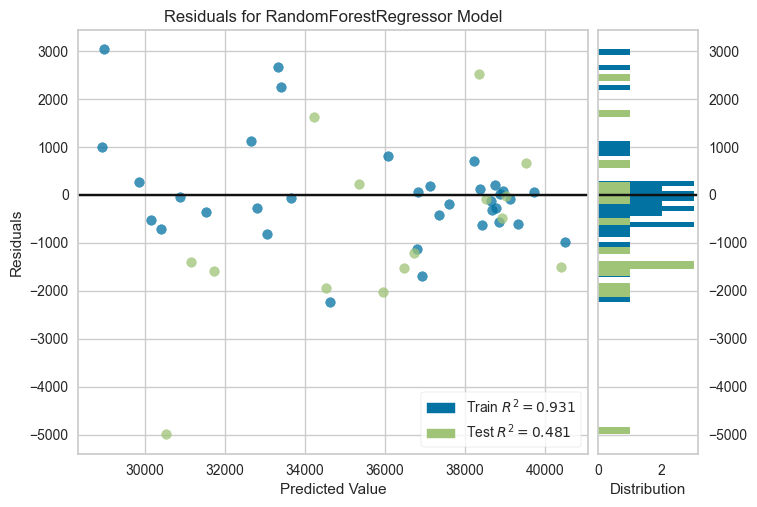

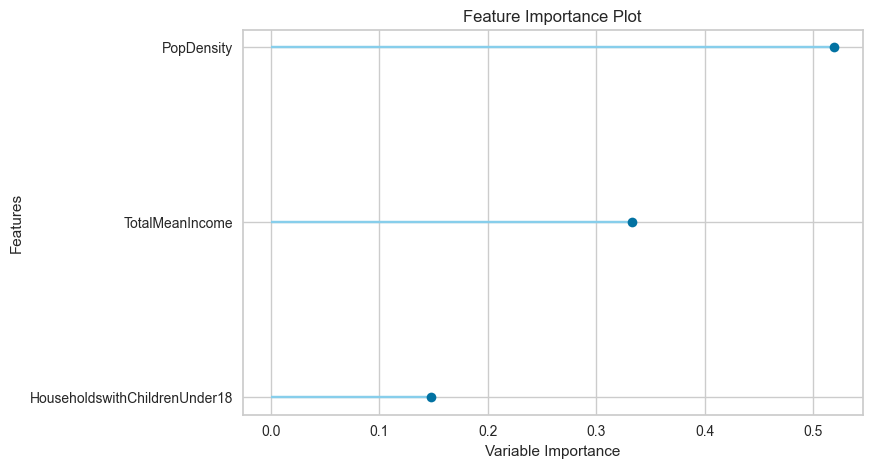

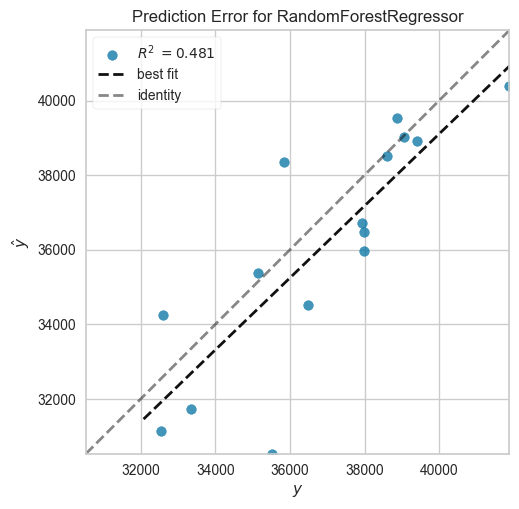

In [66]:
plot_model(best2, plot = 'residuals')
plot_model(best2, plot = 'feature')
plot_model(best2, plot = 'error')

In [67]:
# Safety Score
from pycaret.regression import *
s3 = setup(data_safety, target = 'AvgSafetyScore',session_id=1243,
           remove_multicollinearity = True, multicollinearity_threshold = 0.7,
           normalize=True, normalize_method='zscore')
best3 = compare_models()

,Description,Value
0,Session id,1243
1,Target,AvgSafetyScore
2,Target type,Regression
3,Original data shape,"(50, 7)"
4,Transformed data shape,"(50, 7)"
5,Transformed train set shape,"(35, 7)"
6,Transformed test set shape,"(15, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1018,0.0232,0.1227,-1.2397,0.0214,0.0216,0.0380
en,Elastic Net,0.0995,0.0266,0.1333,-1.2421,0.0232,0.0212,0.0090
llar,Lasso Least Angle Regression,0.0995,0.0266,0.1333,-1.2421,0.0232,0.0212,0.0060
dummy,Dummy Regressor,0.0995,0.0266,0.1333,-1.2421,0.0232,0.0212,0.0070
lightgbm,Light Gradient Boosting Machine,0.0995,0.0266,0.1333,-1.2421,0.0232,0.0212,0.0100
lasso,Lasso Regression,0.0995,0.0266,0.1333,-1.2421,0.0232,0.0212,0.0070
knn,K Neighbors Regressor,0.0981,0.0227,0.1243,-1.3188,0.0217,0.0209,0.0200
ada,AdaBoost Regressor,0.1036,0.0336,0.1351,-1.4639,0.0236,0.0222,0.0280
br,Bayesian Ridge,0.1073,0.0219,0.1274,-1.6834,0.0222,0.0227,0.0070
rf,Random Forest Regressor,0.1172,0.0298,0.1432,-2.1101,0.0250,0.0249,0.0830


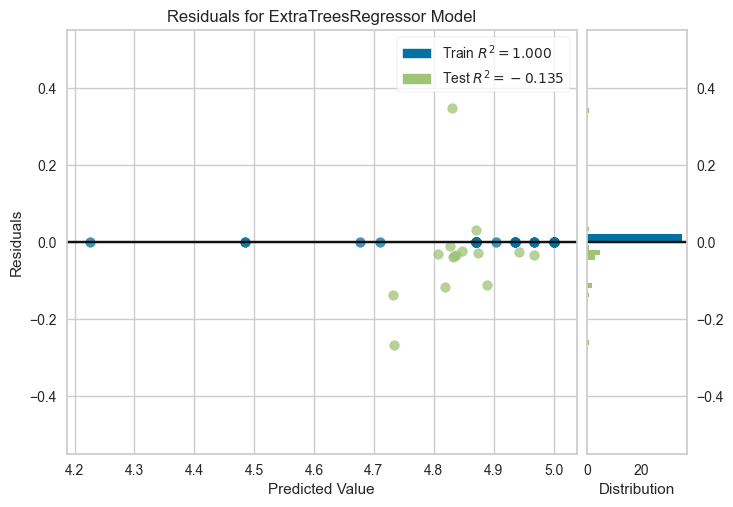

In [68]:
plot_model(best3, plot = 'residuals')

In [69]:
# Seats
from pycaret.regression import *
s4 = setup(data_seats, target = 'AvgSeats',session_id=1243,
           pca = True, pca_components = 6, normalize=True, normalize_method='zscore')
best4 = compare_models()

,Description,Value
0,Session id,1243
1,Target,AvgSeats
2,Target type,Regression
3,Original data shape,"(50, 7)"
4,Transformed data shape,"(50, 7)"
5,Transformed train set shape,"(35, 7)"
6,Transformed test set shape,"(15, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2655,0.1406,0.3154,-5.2096,0.0505,0.0514,0.0510
huber,Huber Regressor,0.2496,0.1277,0.3045,-5.5967,0.0486,0.0481,0.0100
gbr,Gradient Boosting Regressor,0.2788,0.1409,0.3347,-6.6778,0.0534,0.0537,0.0270
dt,Decision Tree Regressor,0.3253,0.2158,0.3751,-6.9020,0.0603,0.0630,0.0080
lr,Linear Regression,0.2677,0.1335,0.3230,-8.1273,0.0512,0.0510,0.0150
lar,Least Angle Regression,0.2677,0.1335,0.3230,-8.1273,0.0512,0.0510,0.0060
ada,AdaBoost Regressor,0.2880,0.1634,0.3566,-8.2380,0.0571,0.0561,0.0320
ridge,Ridge Regression,0.2650,0.1298,0.3164,-8.2896,0.0503,0.0507,0.0080
et,Extra Trees Regressor,0.3006,0.1550,0.3535,-10.6549,0.0565,0.0579,0.0340
br,Bayesian Ridge,0.3033,0.1598,0.3602,-10.8004,0.0576,0.0586,0.0100


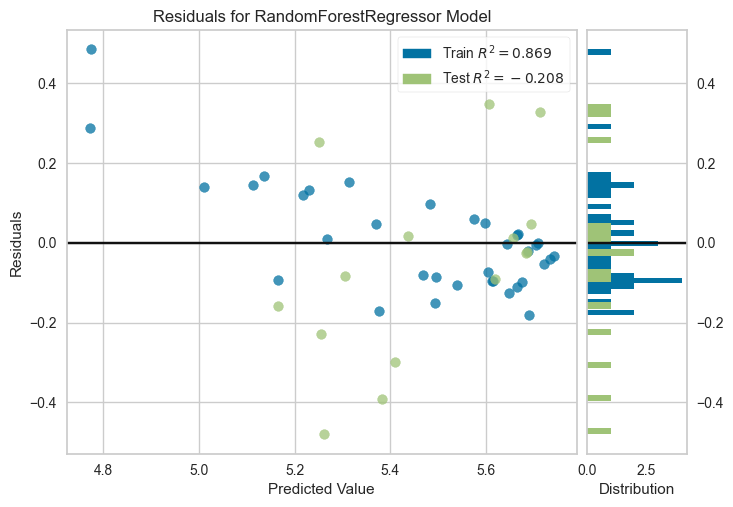

In [70]:
plot_model(best4, plot = 'residuals')